#Spaceship Titanic : Predict which passengers are transported to an alternate dimension 🚀

#in this project we're going to follow these 6 steps :
##1. Problem Definition
##2. Data Description
##3. EDA
##4. Modelling
##5. Evaluation

#1. Problem definition

Our task is to classify whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

#2. Data Description



The data is downloadable from https://www.kaggle.com/competitions/spaceship-titanic/data, we have training and test sets each have the following features :

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported (Target)** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

#3. Exploratory Data Analysis

In [ ]:
#importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Spaceship titanic/train.csv")

In [ ]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
#checking for missing values
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

> Data has missing values, we will determine the best strategies to deal with them later

In [ ]:
#getting an overall vue about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


> we can see that some features need encoding and processing before we can pass them to a ML model.

##3.1 Data Preprocessing

###3.1.1 Dealing with missing values


In [ ]:
#investigating the variables with missing values
var_with_nans=[column for column in data.columns if data[column].isna().sum()!=0]
var_with_nans

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

Dealing with missing values in Categorical variables using their mode

In [ ]:
#filtering the categorical variables with missing values
cat_var_nan=[column for column in data.columns if (data[column].isna().sum()!=0) & (str(data[column].dtype)=='object')]
cat_var_nan

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

In [ ]:
#filling their missing values by the mode of each variable
for column in cat_var_nan :
   data[column].fillna(value=data[column].mode()[0],inplace=True)

Dealing with missing values in Numerical variables using their median

In [ ]:
#filtering the numerical variables with missing values
num_var_nan=[column for column in data.columns if (data[column].isna().sum()!=0) & (str(data[column].dtype)=='float64')]
num_var_nan

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
#filling their missing calues by the median of each variable
for column in num_var_nan :
   data[column].fillna(value=data[column].median(),inplace=True)

In [ ]:
data.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

> After dealing with missing values, we will transform the data so that it's suitable for modeling

###3.1.1.1 Feature Engineering

In [ ]:
#extracting the cabin deck from variable Cabin
def extract_deck(x) :
    return x[0]
data['Cabin_deck']=data['Cabin'].apply(extract_deck)

In [ ]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F


###3.1.2 Encoding the categorical variables

In [ ]:
#visualizing the types of categorical variables
for column in cat_var_nan :
    print((column,data[column].unique()))

('HomePlanet', array(['Europa', 'Earth', 'Mars'], dtype=object))
('CryoSleep', array([False,  True]))
('Cabin', array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object))
('Destination', array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object))
('VIP', array([False,  True]))
('Name', array(['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', ...,
       'Fayey Connon', 'Celeon Hontichre', 'Propsh Hontichre'],
      dtype=object))


> We can see that variables such as Name, Cabin and PassengerID have too many unique values and they won't be of any help to us so we will delete them.

In [ ]:
#encoding the boolean variables as 0 or 1
for column in ('VIP','CryoSleep','Transported') :
    data[column]=data[column].apply(lambda x : 1 if x==True else 0)


#one-hot encoding the categorical variables
data=pd.get_dummies(data,columns=['HomePlanet','Destination'])
#label encoding the Cabin_deck variable
decks=list(data['Cabin_deck'].unique())
decks.sort()
def label_deck(x) :
    return decks.index(x)+1
data['Cabin_deck']=data['Cabin_deck'].apply(label_deck)

In [ ]:
#deleting the variables that have too many unique values
data.drop(['Name','PassengerId','Cabin'],axis=1,inplace=True)

In [ ]:
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,2,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,6,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,6,1,0,0,0,0,1


> Now we're done with cleaning the data we can begin our analysis to try to gain some insights that would help us in our modeling

##3.2 Analysing the data

###3.2.1 Analysing the target variable

In [ ]:
#checking the distribution of the target
target_distribution=data.Transported.value_counts(normalize=True)
target_distribution

1    0.503624
0    0.496376
Name: Transported, dtype: float64

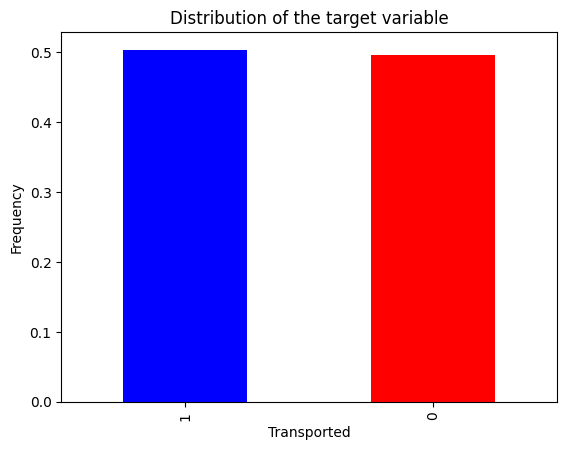

In [ ]:
#plotting the distribution of the target variable :
target_distribution.plot(kind='bar', title="Distribution of the target variable",color=['blue','red'],ylabel='Frequency',xlabel='Transported');

> we can see that the dataset is balanced, so it's a balanced classification problem, this will help us after for picking the right classification metrics to evaluate our models with.

###3.2.2 Analysing the features

In [ ]:
#some basic info about the features
data.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,28.790291,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820,0.503624,5.344185,0.552514,0.245140,0.202347,0.207063,0.091568,0.701369
std,0.476796,14.341404,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417,0.500016,1.775938,0.497263,0.430195,0.401772,0.405224,0.288432,0.457684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,37.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> We can see right away that age has a weird value of 0 so we will investigate it

In [ ]:
#visualing the people with age 0
data[data['Age']==0].head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
19,0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,7,1,0,0,0,0,1
61,1,0.0,0,0.0,0.0,0.0,0.0,0.0,1,7,1,0,0,0,1,0
86,1,0.0,0,0.0,0.0,0.0,0.0,0.0,1,7,1,0,0,0,0,1
102,0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,7,1,0,0,0,0,1
157,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,7,1,0,0,0,0,1


> We can see that these people don't have values for a lot of features in the data so we don't know much about them, we can delete them because i don't think they will help the model learn anything.

In [ ]:
#dropping the people with age 0
IndexAge=data[data['Age']==0].index
data.drop(IndexAge,inplace=True)

In [ ]:
#checking if the delete was successful
data.Age.unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  1., 49., 29., 10.,  7., 21., 62., 15., 43., 47.,
        2., 20., 23., 30., 17., 55.,  4., 19., 56., 25., 38., 36., 22.,
       18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64., 67., 61.,
       50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5., 79., 68.,
       74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66., 69., 72.,
       77.])

Visualizing the distributions of numerical features

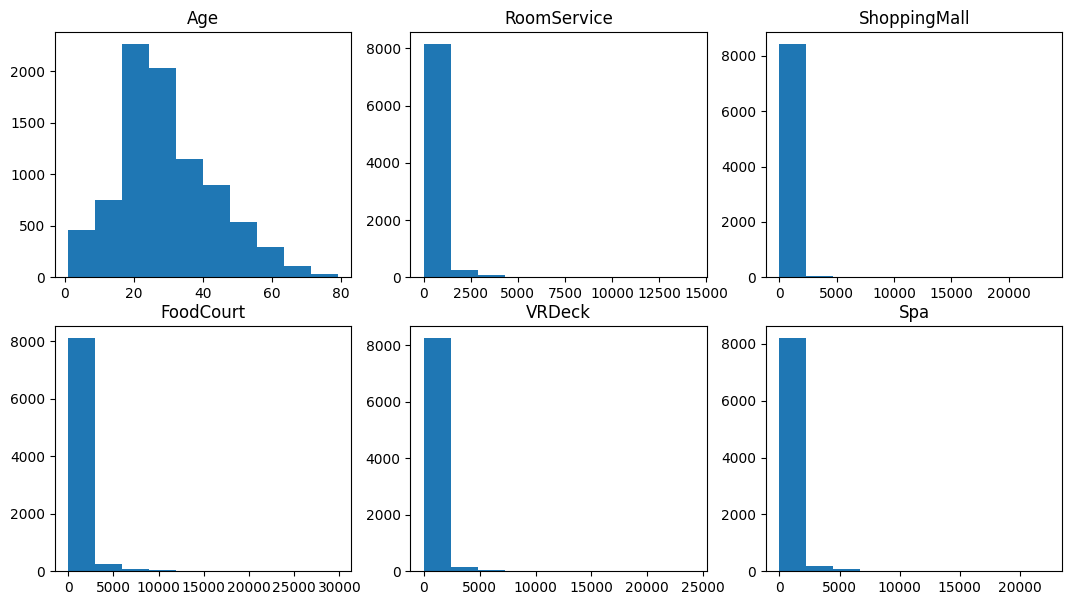

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(13,7))
count=0
features=['Age','RoomService','ShoppingMall','FoodCourt','VRDeck','Spa']
for i in range(2) :
  for j in range(3) :
    ax[i][j].hist(data[features[count]])
    ax[i][j].set(title=features[count])
    count+=1

> **Note :**  the variable "Age" has a somewhat normal distribution, while the other numerical variables are mostly 0, maybe that could be an important information for predicting the people that were transported to another dimension.

Correlation Matrix

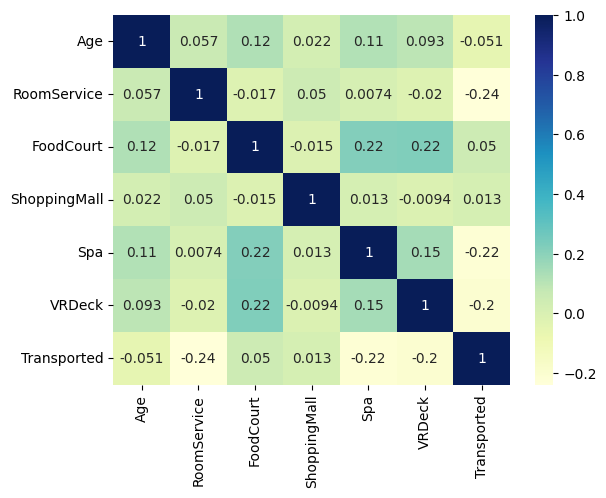

In [ ]:
corr_matrix=data[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']].corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True);

> we can see that the data suggests that how much passengers spent in luxury amenities actually impacts their chances of survival

Examining the relationship between categorical variables and the target

In [ ]:
#building a cross tabulation to see the relationship between variables "VIP", "CryoSleep","HomePlanet","Destination" and the target
crosstab_1=pd.crosstab(data['VIP'],data['Transported'],normalize='index')
crosstab_1

Transported,0,1
VIP,,
0,0.50000,0.50000
1,0.61809,0.38191


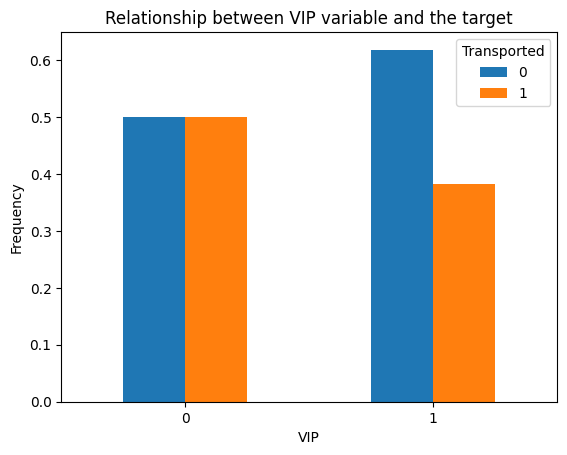

In [ ]:
#plotting the findings
crosstab_1.plot.bar(rot=0,title='Relationship between VIP variable and the target',xlabel='VIP', ylabel='Frequency');


> we can see that the number of people who weren't VIP and were transported is the same as the number of people who weren't VIP and weren't transported, while 62% of the people that were VIP weren't transported while the other 38% were transported, this tells us that people who were VIP had more chances of survival. (we can test this via a chi-squared test if we want to be more sure about our findings)

In [ ]:
crosstab_2=pd.crosstab(data['CryoSleep'],data['Transported'],normalize='index')
crosstab_2

Transported,0,1
CryoSleep,,
0,0.673995,0.326005
1,0.182401,0.817599


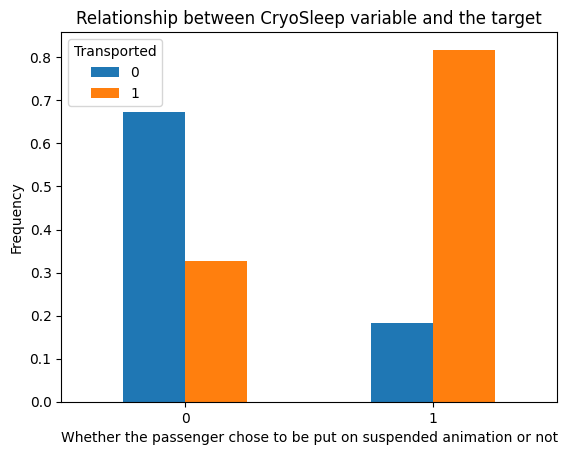

In [ ]:
#plotting the findings
crosstab_2.plot.bar(rot=0,title='Relationship between CryoSleep variable and the target',
                    xlabel='Whether the passenger chose to be put on suspended animation or not',
                    ylabel='Frequency');

> again we can see that 67% of people who didn't chose to be put on suspended animation for the duration of their flight weren't transported while the other 33% got transported, and 81% of the people who chose to be put on suspended animation for the duration of their flight were transported while the other 19% didn't get transported, this shows that there is indeed a relationship between whether the passenger chose to be in suspended animation or not affects their chances to be transported.

In [ ]:
crosstab_3=pd.crosstab(data['Cabin_deck'],data['Transported'],normalize='index')
crosstab_3

Transported,0,1
Cabin_deck,,
1,0.507937,0.492063
2,0.265725,0.734275
3,0.322102,0.677898
4,0.566946,0.433054
5,0.644903,0.355097
6,0.568727,0.431273
7,0.495068,0.504932
8,0.800000,0.200000


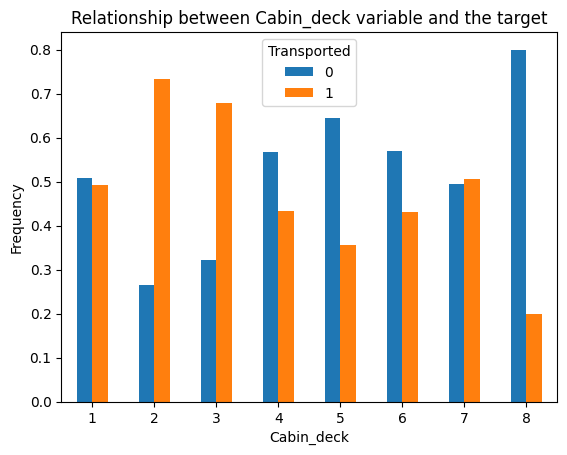

In [ ]:
#plotting the findings
crosstab_3.plot.bar(rot=0,title='Relationship between Cabin_deck variable and the target',
                    xlabel='Cabin_deck',
                    ylabel='Frequency');

### Key findngs from this dataset :

*   *The amount passengers spent on luxery amenities correlates negatively with whether they were transported or not, we cannot assume causation yet tho.*
*   *Whether a passenger was VIP or not actually affects negatively whether they got transported or not, this means VIP people have less chances to get transported than not VIP people.*
*   *whether a passenger was put in a suspended animation for the duration of their flight or not affects positively their chances of getting transported, this means if a passenger has been put in suspended animation they have more chances of getting transported than people who weren't in suspended animation.*



# 4. Modeling

##4.1 Building baseline models and choosing the best performing one

In [ ]:
#importing the models we will work with
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing the preprocessing tools
from sklearn.model_selection import train_test_split

#importing the tuning tool
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
np.random.seed(42)
#splitting the data into X and y
X=data.drop('Transported',axis=1)
y=data['Transported']
#splitting into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
783,0,19.0,0,0.0,561.0,10.0,0.0,161.0,6,1,0,0,0,0,1
7004,0,20.0,0,120.0,321.0,0.0,932.0,175.0,6,1,0,0,0,1,0
2347,0,48.0,0,639.0,412.0,110.0,0.0,0.0,6,0,0,1,0,0,1
8008,0,33.0,0,0.0,739.0,0.0,140.0,6901.0,1,0,1,0,0,0,1
3381,1,41.0,0,0.0,0.0,0.0,0.0,0.0,7,1,0,0,0,0,1


In [ ]:
#creating function to fit models
def fit_models(models,X,y) :
    for model in models.values() :
        model.fit(X,y)

In [ ]:
#creating function to evaluate models
def evaluate_models(models,X_train,y_train,X_test,y_test) :
    scores={}
    for model_name, model in models.items() :
        scores[model_name]={}
        scores[model_name]['Training']=model.score(X_train,y_train)
        scores[model_name]['Test']=model.score(X_test,y_test)
    return scores

In [ ]:
models={'KNN' : KNeighborsClassifier(),'RandomForest' : RandomForestClassifier(n_estimators=1000),
        'Log Regressor' : LogisticRegression(max_iter=1000)}
fit_models(models,X_train,y_train)
scores=evaluate_models(models,X_train,y_train,X_test,y_test)
scores

{'KNN': {'Training': 0.8198766881972989, 'Test': 0.7739283617146212},
 'RandomForest': {'Training': 0.9393716970052848, 'Test': 0.8032883147386964},
 'Log Regressor': {'Training': 0.7805343511450382, 'Test': 0.7956547269524369}}

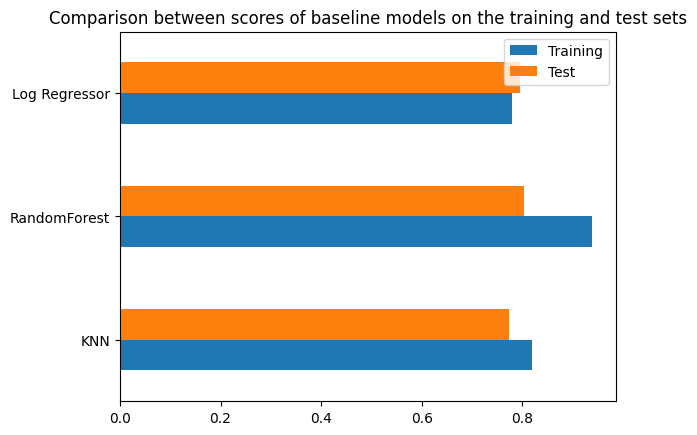

In [ ]:
pd.DataFrame(scores).T.plot(kind='barh',legend=True,
                            title='Comparison between scores of baseline models on the training and test sets');

> We can see that among the baseline models we chose, the random forest performs best both on the training data and on the test data.

##4.2 Hyperparameter tuning

In [ ]:
#making a grid for our hyperparameters values
param_grid={'n_estimators' : range(1000,10000,1000),
            'criterion' : ['gini','entropy','log_loss'],
            'min_samples_split' : range(2,10,1),
            'max_features' : ['sqrt','log2']}

In [ ]:
#running a RandomizedSeachCV
rcv_model=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_grid,n_iter=100,refit=True,random_state=42,verbose=3)
rcv_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=log_loss, max_features=log2, min_samples_split=9, n_estimators=2000;, score=0.789 total time=  11.2s
[CV 2/5] END criterion=log_loss, max_features=log2, min_samples_split=9, n_estimators=2000;, score=0.782 total time=  11.1s
[CV 3/5] END criterion=log_loss, max_features=log2, min_samples_split=9, n_estimators=2000;, score=0.800 total time=  11.2s
[CV 4/5] END criterion=log_loss, max_features=log2, min_samples_split=9, n_estimators=2000;, score=0.786 total time=  11.1s
[CV 5/5] END criterion=log_loss, max_features=log2, min_samples_split=9, n_estimators=2000;, score=0.797 total time=  10.8s
[CV 1/5] END criterion=gini, max_features=log2, min_samples_split=2, n_estimators=4000;, score=0.786 total time=  21.7s
[CV 2/5] END criterion=gini, max_features=log2, min_samples_split=2, n_estimators=4000;, score=0.780 total time=  20.7s
[CV 3/5] END criterion=gini, max_features=log2, min_samples_split=2, n_estima

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(1000, 10000, 1000)},
                   random_state=42, verbose=3)

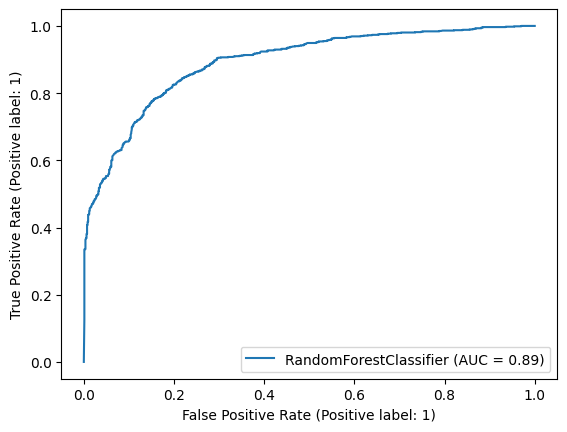

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rcv_model.best_estimator_,X_test,y_test)

In [ ]:
rcv_model.best_estimator_.score(X_train,y_train)

0.8957721667645332

In [ ]:
rcv_model.best_params_

{'n_estimators': 4000,
 'min_samples_split': 9,
 'max_features': 'log2',
 'criterion': 'log_loss'}